# YOLOv5 is a recent release of the YOLO family of models. YOLO was initially introduced as the first object detection model that combined bounding box prediction and object classification into a single end to end differentiable network. It was written and is maintained in a framework called Darknet. YOLOv5 is the first of the YOLO models to be written in the PyTorch framework and it is much more lightweight and easy to use. That said, YOLOv5 did not make major architectural changes to the network in YOLOv4 and does not outperform YOLOv4 on a common benchmark, the COCO dataset.



# importing libraries

In [4]:
import torch
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# calling YOLOV5s (yolo v5 small) model using torch

In [2]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5m, yolov5l, yolov5x, custom


Using cache found in C:\Users\aishw/.cache\torch\hub\ultralytics_yolov5_master


ImportError: DLL load failed while importing offsets: Error performing inpage operation.

# reading video from the directory, processing the video and then writing the output video

In [ ]:
#cap = cv2.VideoCapture(0)

# reading video
cap = cv2.VideoCapture('test1.mp4')

# finding the height and width of the video frames
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# creating object to write video in AVI extension
out = cv2.VideoWriter('outpy1.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

while(True):
    
    # reading frame from the video
    ret, frame = cap.read()    
    
    # passing the read frames to the YOLOV5s model
    results = model(frame)
    
    # finding the x1,y1,x2,y2 coordinates and labels of the bounding boxes of the detected objects in the video from the result object
    cords = results.xyxy[0].numpy()
    
    # reading individual box data
    for c in cords:
        
        # finding coordinates and labels
        # x1 = c[0]
        # x2 = c[2]
        # x3 = c[1]
        # x4 = c[3]
        
        #creating points
        
        # point1
        p1 = (int(c[0]),int(c[1]))
        # point2 
        p2 = (int(c[2]),int(c[3]))
        
        # drawing bounding boxes/rectangles around the objects using found coordinates
        image = cv2.rectangle(frame, p1,p2, (36,255,12), 2)
        
        # putting text (labels) on the rectangle
        cv2.putText(image,results.names[int(c[5])], (int(c[0]), int(c[1])-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (36,255,12), 2,lineType=cv2.LINE_AA)

    # here writing the video using the out object that we have created above
    out.write(frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

# on images

In [53]:
img = 'try.jpg'
image = plt.imread(img)

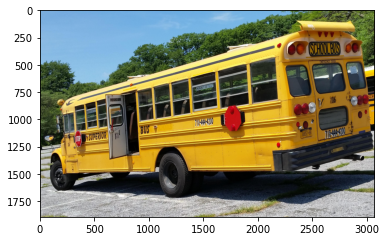

In [54]:
plt.imshow(image)

In [55]:
im_result = model(img)

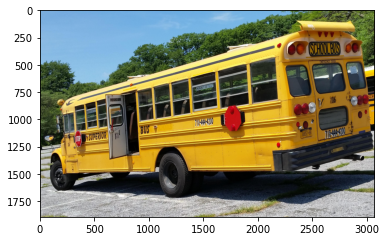

In [56]:
plt.imshow(im_result.imgs[0])

In [57]:
coords = im_result.xyxy[0].numpy()

In [58]:
coords

array([[          0,      131.79,        3071,      1723.9,     0.80729,           5],
       [     315.68,      1099.5,      381.43,      1244.9,     0.38468,          11]], dtype=float32)

In [59]:
im_result.names[11]

'stop sign'

In [60]:
im_result.names[5]

'bus'

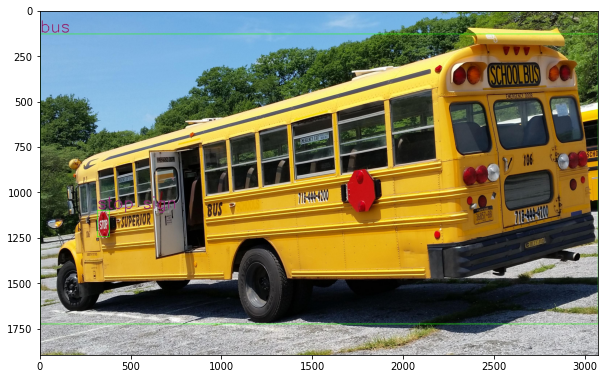

In [71]:
plt.figure(figsize=(10, 10))
for coord in coords:
    # point1
    p1 = (int(coord[0]),int(coord[1]))
    # point2 
    p2 = (int(coord[2]),int(coord[3]))

    # drawing bounding boxes/rectangles around the objects using found coordinates
    im = cv2.rectangle(image, p1,p2, (36,255,12), 2)
    cv2.putText(im,results.names[int(coord[5])], (int(coord[0]), int(coord[1])-10), cv2.FONT_HERSHEY_SIMPLEX, 3, (130,10,100), 4,lineType=cv2.LINE_8)
plt.imshow(im)